<a href="https://colab.research.google.com/github/Marelyn15/inmersion-datos-alura-dia3/blob/main/Inmersion_de_datos_Alura3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [5]:
inmuebles = pd.read_csv('/content/drive/MyDrive/Inmersion de datos - Alura -/inmuebles_bogota.csv')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]

inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000

pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x:'%.2f'%x)
inmuebles.describe()

inmuebles['Valor_m2_Millon'] = inmuebles['Precio_Millon']/inmuebles['Área']
datos_barrio = inmuebles.groupby('Barrio').sum()
datos_barrio['Valor_m2_Barrio'] = datos_barrio['Precio_Millon']/datos_barrio['Área']
m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])
inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio'].map(m2_barrio)
inmuebles.head(3)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,8.10


In [9]:
datos_barrio.reset_index(inplace=True)

In [10]:
datos_barrio


,Barrio,Habitaciones,Baños,Área,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Alameda,3,2,97,580.00,5.98,5.98
1,Alhambra,51,50,3237,12790.00,73.56,3.95
2,Andes Norte,21,20,874,4967.00,42.35,5.68
3,Antonio Nariño,207,120,7827,22042.65,169.47,2.82
4,Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.00,26.58,1.94
145,Villas De Granada,76,51,1905,6210.62,69.71,3.26
146,Villemar,53,37,1384,5469.00,71.81,3.95
147,Zona Franca,2,1,54,160.00,2.96,2.96


In [11]:
top_barrios = inmuebles['Barrio'].value_counts()[:10].index

In [12]:
top_barrios

Index(['Usaquén', 'Zona Noroccidental', 'Bosa', 'Kennedy', 'Cedritos',
       'Barrios Unidos', 'Engativa', 'Suba', 'Santa Barbara', 'Chapinero'],
      dtype='object')

In [13]:
datos_barrio.query('Barrio in @top_barrios')

,Barrio,Habitaciones,Baños,Área,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
5,Barrios Unidos,1525,1196,87799,259877.76,2070.61,2.96
10,Bosa,1743,789,34879,93400.56,1654.36,2.68
22,Cedritos,1458,1348,53711,270027.73,2853.23,5.03
24,Chapinero,892,913,81248,372130.93,2466.03,4.58
50,Engativa,1676,1077,59808,172711.73,1795.71,2.89
63,Kennedy,2151,1233,61475,207963.65,2127.66,3.38
125,Santa Barbara,1073,1162,54693,320097.80,2701.88,5.85
132,Suba,1497,1202,61615,266406.04,2000.72,4.32
138,Usaquén,3109,3044,148121,837710.36,6334.04,5.66
148,Zona Noroccidental,2778,2204,119084,544453.06,4049.16,4.57


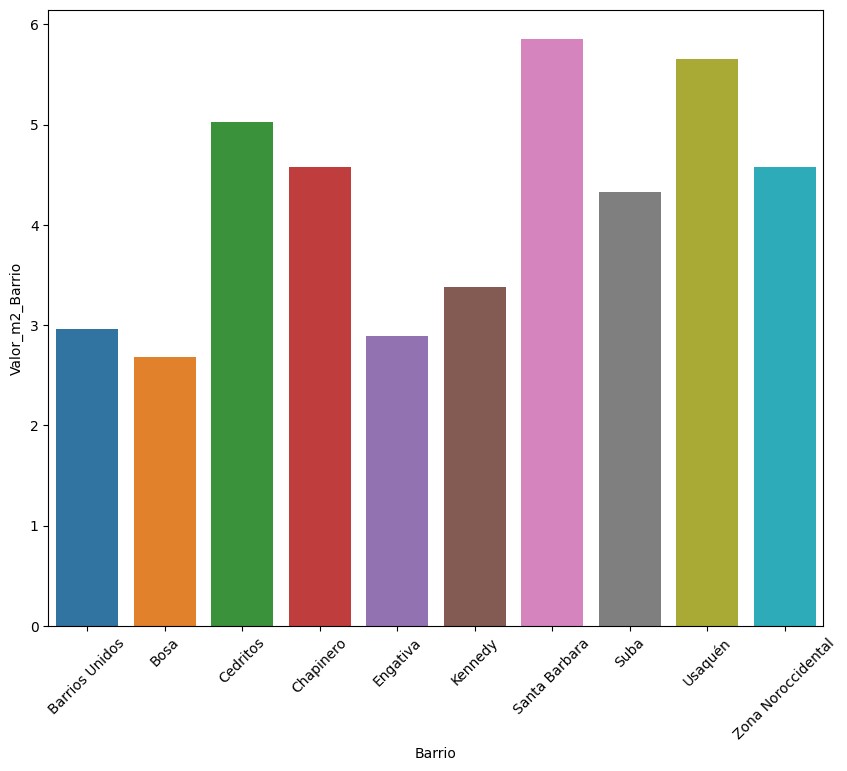

In [16]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Barrio', y='Valor_m2_Barrio', data = datos_barrio.query('Barrio in @top_barrios'))
ax.tick_params(axis='x', rotation=45)

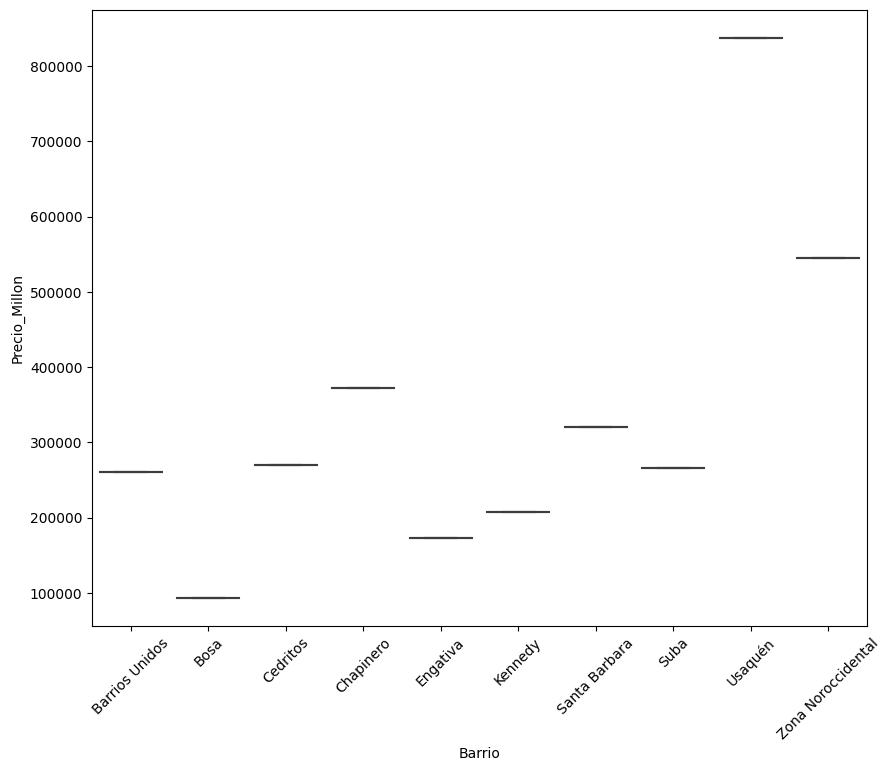

In [18]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Precio_Millon', data = datos_barrio.query('Barrio in @top_barrios'))
ax.tick_params(axis='x', rotation=45)
plt.show()

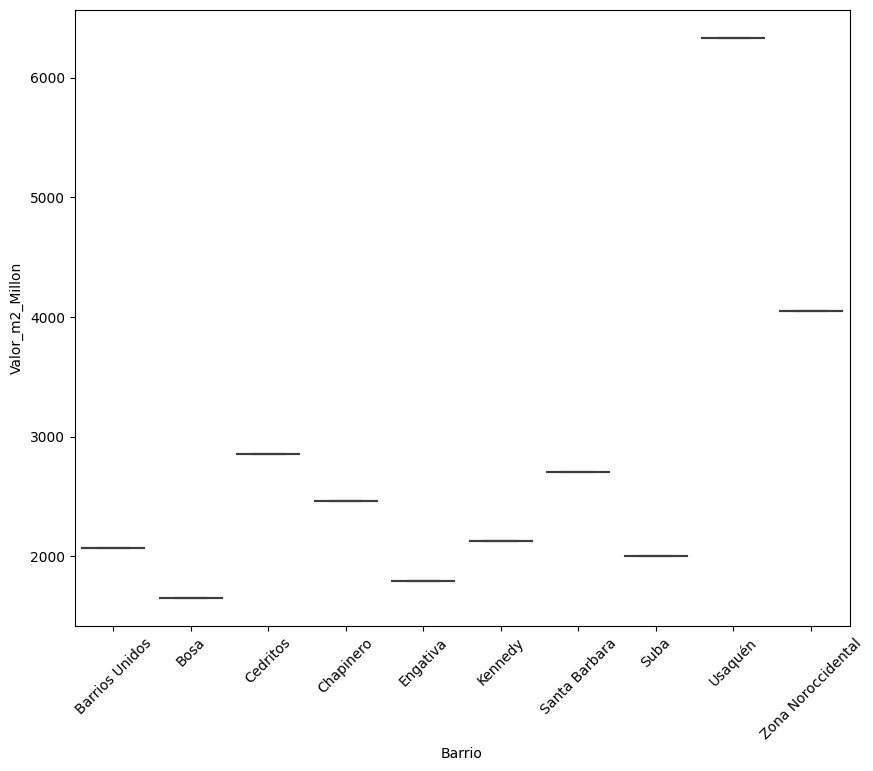

In [20]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Valor_m2_Millon', data = datos_barrio.query('Barrio in @top_barrios'))
ax.tick_params(axis='x', rotation=45)
plt.show()